<a href="https://colab.research.google.com/github/trsarje/AmazonMusicReview/blob/main/AmazonMusic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords  
from nltk.probability import FreqDist
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
import sklearn
from sklearn.model_selection import train_test_split
import gensim
from gensim.utils import simple_preprocess
import csv
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
ip_data = pd.read_csv("/content/drive/MyDrive/AmazonMusic/data/Music.csv")

In [3]:
data = ip_data.sample(frac=0.01, random_state=0)   # Taking a sample of data to suitable for RAM
data.head()

,productId,title,userId,review,score
3477750,B00006LI4S,David Gilmour in Concert - Live at Robert Wyat...,unknown,I bought the DVD several months ago. I had nev...,5.0
6298848,B00000IAU3,No Angel,A5OYA02OQJTMU,The voice of Dido is unbelievable talented and...,3.0
4109460,B000J234QG,Joshua Tree,A1VABWDOUQLULZ,I know it's clich&eacute;d. I know the band ha...,5.0
5651752,B000A29B2Q,In the Skies,A28OGM5C71B1XD,This is Peter's first solo release and his thi...,4.0
394058,B00001R3N7,Famous Monsters,A2S409SX8V43BJ,To those who truly believe that there is no su...,5.0


In [4]:
unique_prod = np.unique(data.productId)
unique_user = np.unique(data.userId)
(len(data), len(unique_user), len(unique_prod))

(63964, 41161, 40824)

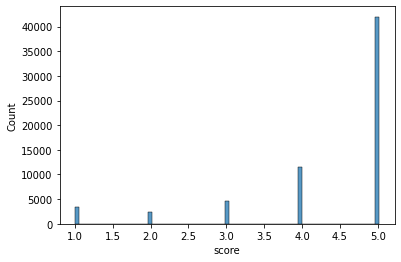

In [5]:
sns.histplot(data=data, x='score',binwidth=0.06, kde=False,)
plt.show()

In [6]:
prod_indx = np.arange(len(unique_prod))
product = {unique_prod[i]:prod_indx[i] for i in range(len(unique_prod))}
prod = [product[i] for i in data.productId]
data.insert(1, 'prod', prod, True)

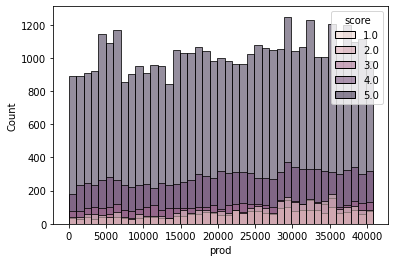

In [7]:
sns.histplot(data=data, x='prod', hue='score')
plt.show()

In [8]:
reviwes = []
length = []
stop_words = set(stopwords.words('english'))  
for tx in data.review:
  res = re.sub(r'[^\w\s]', '', tx)
  res = re.sub(r'[0-9]', '', res)
  tx = res.split(" ")
  reviwes.append([w.lower() for w in tx if w.lower() not in stop_words])
  length.append(len([w.lower() for w in tx if w.lower() not in stop_words]))
length = np.array(length)
reviwes = np.array(reviwes)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


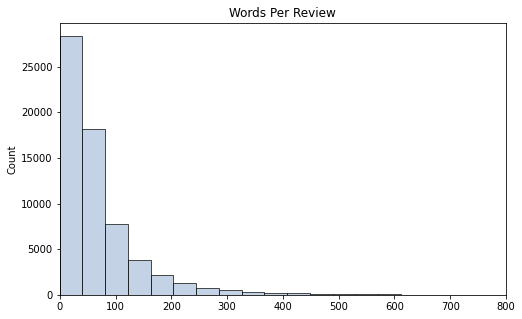

In [10]:
plt.figure(figsize=(8, 5))
plt.title('Words Per Review')
sns.histplot(length, kde=False, bins=60, color="lightsteelblue")
plt.xlim(0,800)
plt.show()

In [11]:
word_counts = {}
for tokens in reviwes:
    for token in tokens:
        if token in word_counts:
            word_counts[token] += 1
        else:
            word_counts[token] = 1
            
top_word_counts = sorted(word_counts.items(), key=lambda i: i[1], reverse=True)

<BarContainer object of 19 artists>

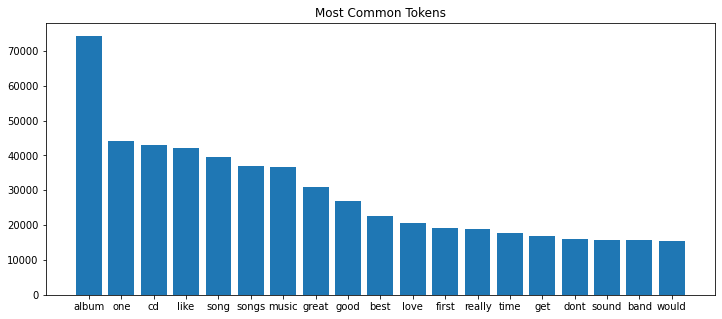

In [12]:
plt.figure(figsize=(12, 5))
plt.title('Most Common Tokens')
plt.bar(x=[x[0] for x in top_word_counts[1:20]], height=[x[1] for x in top_word_counts[1:20]])